In [1]:
%load_ext autoreload
# %load_ext memory_profiler
%autoreload 2
%matplotlib inline
from context import planvec

In [91]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import measure, segmentation

from planvec import img_proc
from planvec.common import PROJECT_ROOT_PATH

In [450]:
ASSETS_DIR      = os.path.join(PROJECT_ROOT_PATH, 'test', 'assets')
INPUT_IMAGE     = 'greifer.jpg'
OUTPUT_PDF_NAME = 'sample_output.pdf'

input_img = planvec.io.read_img(ASSETS_DIR, INPUT_IMAGE)
img = img_proc.copy_img(input_img)  # Perform processing on image copy to keep original input unaltered

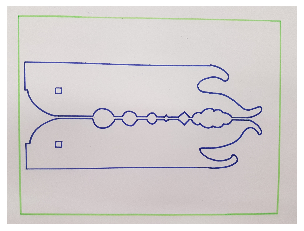

In [451]:
# Input image
planvec.vizualization.imshow(img, axis='off')

In [452]:
# Experimental!

#hsv_start = [0, 100, 50]
#hsv_end = [255, 255, 150]
#filtered_img = img_proc.filter_by_hsv_range(img, hsv_start, hsv_end)
#planvec.vizualization.imshow(filtered_img, figsize=(10,7), axis='off')

In [453]:
# Threshold processing
img = img_proc.img_to_greyscale(img)
img = img_proc.add_gaussian_blur(img, 5, 5)
img_thresh = img_proc.thresh_img(img, thresh_val=185, max_val=255, thresh_type=cv2.THRESH_BINARY)

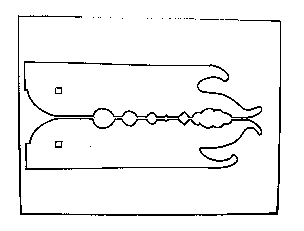

In [454]:
planvec.vizualization.imshow(img_thresh)

In [455]:
# Find and plots contours
#contours = img_proc.find_contours(img_thresh, 254)
#contours = img_proc.filter_contours_by_size(contours, n_points_thresh=1000)
#planvec.vizualization.plot_contours(contours, axis='on', figsize=(7, 10))

In [456]:
# Labelling connected regions
labelled_img, n = measure.label(img_thresh, background=0, return_num=True)
regions = measure.regionprops(labelled_img)

In [457]:
# Filtering regions
img_labelled_proc, filtered_regions = img_proc.filter_regions(labelled_img, regionprops=regions, area_threshold=50000)

Region 1 has area: 8065138 == (image size). Removed.
Region 2 has area: 4 < 50000. Too small. Removed.
Region 3 has area: 18 < 50000. Too small. Removed.
Region 4 has area: 11 < 50000. Too small. Removed.
Region 5 has area: 22 < 50000. Too small. Removed.
Region 6 has area: 6 < 50000. Too small. Removed.
Region 7 has area: 17 < 50000. Too small. Removed.
Region 8 has area: 18 < 50000. Too small. Removed.
Region 9 has area: 1 < 50000. Too small. Removed.
Region 10 has area: 10 < 50000. Too small. Removed.
Region 11 has area: 6 < 50000. Too small. Removed.
Region 12 has area: 1 < 50000. Too small. Removed.
Region 13 has area: 2 < 50000. Too small. Removed.
Region 14 has area: 4 < 50000. Too small. Removed.
Region 15 has area: 3 < 50000. Too small. Removed.
Region 16 has area: 1 < 50000. Too small. Removed.
Region 17 has area: 1 < 50000. Too small. Removed.
Region 18 has area: 20 < 50000. Too small. Removed.
Region 19 has area: 1 < 50000. Too small. Removed.
Region 20 has area: 7 < 50000.

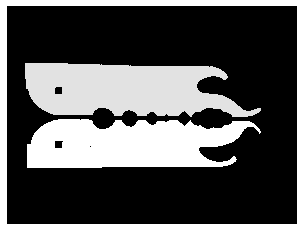

In [458]:
planvec.vizualization.imshow(img_labelled_proc)

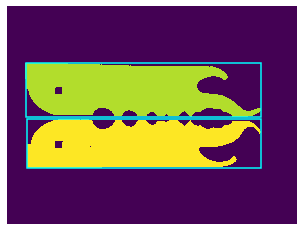

In [459]:
planvec.vizualization.plot_image_regions(img_labelled_proc, filtered_regions)

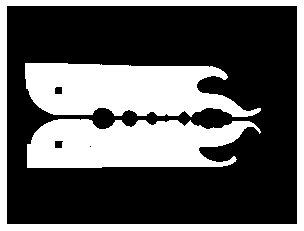

In [460]:
planvec.vizualization.imshow(img_labelled_proc!=0)

Contours left: 4


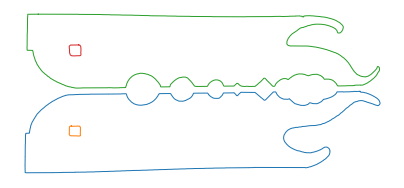

In [461]:
# Find contours of processed labelled image
contours = img_proc.find_contours(img_labelled_proc!=0, 0)
contours = img_proc.filter_contours_by_size(contours, n_points_thresh=100)
planvec.vizualization.plot_contours(contours, axis='off', figsize=(7, 10))
print(f'Contours left: {len(contours)}')

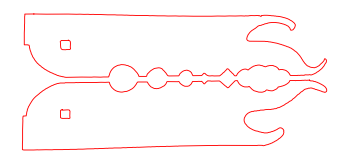

In [501]:
# Smooth contours by polygon approximation
approx_contours = []
for contour in contours:
    approx_contours.append(approximate_polygon(contour.copy(), tolerance=1))
output_fig = planvec.vizualization.plot_contours(approx_contours, axis='off', color='red', linewidth=0.9)

In [500]:
output_fig.savefig('output_lw005.pdf')

In [ ]:
# Stores the processed image to a PDF in the assets directory
# Deprecated
# img_proc.img_to_pdf(os.path.join(ASSETS_DIR, OUTPUT_PDF_NAME), img_thresh)